In [ ]:
from collections import Counter
import itertools

from matplotlib import pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import numpy as np
import pandas as pd

import localuf

# Drawing the Search Graph

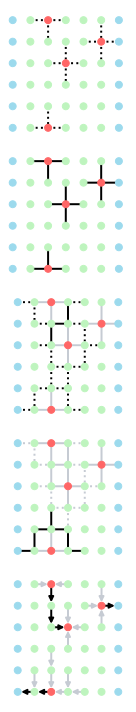

In [2]:
d = 6
sf = localuf.Surface(d, 'code capacity')
syndrome = {
    (0, 1),
    (1, 4),
    (2, 2),
    (5, 1),
}
uf = localuf.decoders.UF(sf)
uf.decode(syndrome, draw=True)

1.0

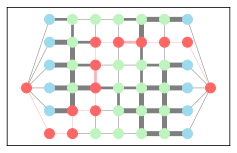

In [ ]:
scale = 0.5
plt.figure(figsize=(scale*(d+2), scale*(d-1)))
uf.swim_distance(draw=True)

0

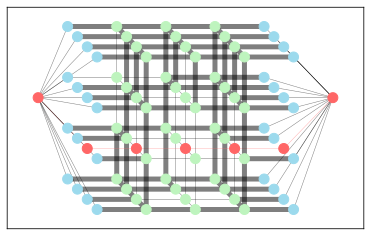

In [ ]:
sf = localuf.Surface(4, 'phenomenological')
syndrome = {(2, 1, 1), (0, 0, 2)}
uf = localuf.decoders.UF(sf)
uf.decode(syndrome)
scale = 0.8
plt.figure(figsize=(scale*(d+2), scale*(d-1)))
uf.swim_distance(draw=True)

# Numerics
Recreating [arXiv:2405.07433, Figure 3].

In [ ]:
# takes about 21 s
noise_level = 0.08
shot_count = int(1e4)

c = Counter()
for d in range(5, 15, 2):
    code = localuf.Surface(d, 'code capacity')
    decoder = localuf.decoders.UF(code)
    for noise_level in itertools.repeat(noise_level, shot_count):
        error = code.make_error(noise_level)
        syndrome = code.get_syndrome(error)
        decoder.decode(syndrome)
        swim_distance = decoder.swim_distance()
        c[d, swim_distance, 'trial_count'] += 1
        c[d, swim_distance, 'failure_count'] += code.get_logical_error(error ^ decoder.correction)
        decoder.reset()

In [ ]:
df = pd.Series(c).unstack().rename_axis(['d', 'swim_distance'])
df['logical_error_probability'] = df['failure_count'] / df['trial_count']
df['log_odds'] = np.log10((1 - df['logical_error_probability']) / df['logical_error_probability'])
df

failure_count  trial_count  logical_error_probability  \
d  swim_distance                                                          
5  0.0                        519         1065                   0.487324   
   1.0                        349         2560                   0.136328   
   2.0                         61         2750                   0.022182   
   3.0                         10         2683                   0.003727   
   4.0                          0          624                   0.000000   
   5.0                          0          318                   0.000000   
7  0.0                        446          964                   0.462656   
   1.0                        266         2087                   0.127456   
   2.0                         73         2511                   0.029072   
   3.0                         11         2350                   0.004681   
   4.0                          1         1416                   0.000706   
   5.0                          0          604                   0.000000   
   6.0                          0           59                   0.000000   
   7.0                          0            9                   0.000000   
9  0.0                        403          824                   0.489078   
   1.0                        286         1863                   0.153516   
   2.0                         61         2229                   0.027367   
   3.0                         15         2288                   0.006556   
   4.0                          1         1677                   0.000596   
   5.0                          0          805                   0.000000   
   6.0                          0          269                   0.000000   
   7.0                          0           45                   0.000000   
11 0.0                        346          691                   0.500724   
   1.0                        222         1626                   0.136531   
   2.0                         64         2036                   0.031434   
   3.0                          9         2161                   0.004165   
   4.0                          2         1824                   0.001096   
   5.0                          0         1094                   0.000000   
   6.0                          0          452                   0.000000   
   7.0                          0          101                   0.000000   
   8.0                          0           14                   0.000000   
   9.0                          0            1                   0.000000   
13 0.0                        330          643                   0.513219   
   1.0                        209         1444                   0.144737   
   2.0                         56         1857                   0.030156   
   3.0                         18         2092                   0.008604   
   4.0                          1         1871                   0.000534   
   5.0                          0         1196                   0.000000   
   6.0                          0          628                   0.000000   
   7.0                          0          211                   0.000000   
   8.0                          0           51                   0.000000   
   9.0                          0            6                   0.000000   
   10.0                         0            1                   0.000000   

                    log_odds  
d  swim_distance            
5  0.0              0.022025  
   1.0              0.801763  
   2.0              1.644261  
   3.0              2.426999  
   4.0                   inf  
   5.0                   inf  
7  0.0              0.064995  
   1.0              0.835428  
   2.0              1.523711  
   3.0              2.327638  
   4.0              3.150756  
   5.0                   inf  
   6.0                   inf  
   7.0                   inf  
9  0.0              0.018977  
   1.0              0.741466  


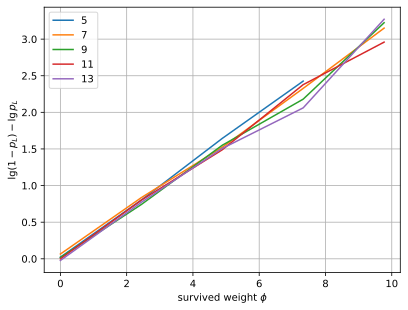

In [ ]:
for d, sub_df in df.groupby('d'):
    plt.plot(
        np.log((1-noise_level)/noise_level) * sub_df.index.get_level_values('swim_distance'),
        sub_df['log_odds'],
        label=str(d),
    )
plt.legend()
plt.xlabel(r'swim distance $\phi$')
plt.ylabel(r'$\lg(1 -p_L) - \lg p_L$')
plt.grid()